In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
dataset = pd.read_csv("Social_Network_Ads.csv")

In [3]:
# Display the first few rows of the dataset
print(dataset.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [4]:
# Data Preprocessing
# Drop 'User ID' as it's not useful for prediction
dataset = dataset.drop(['User ID'], axis=1)

In [5]:
# Encode categorical variables (Gender: Male = 0, Female = 1)
dataset['Gender'] = dataset['Gender'].map({'Male': 0, 'Female': 1})

In [6]:
# Check for missing values
print(dataset.isnull().sum())

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


In [7]:
# Split features and target variable
X = dataset.drop(['Purchased'], axis=1)
y = dataset['Purchased']

In [8]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Apply feature scaling after splitting to avoid data leakage
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# Initialize and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [11]:
# Make predictions
y_pred = knn.predict(X_test)

In [12]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Error Rate
error_rate = 1 - accuracy

# Precision
precision = precision_score(y_test, y_pred)

# Recall
recall = recall_score(y_test, y_pred)

# F1 Score
f1 = f1_score(y_test, y_pred)

In [13]:
# Print the results
print(f"Confusion Matrix:\n{cm}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Error Rate: {error_rate:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Confusion Matrix:
[[48  4]
 [ 2 26]]
Accuracy: 0.9250
Error Rate: 0.0750
Precision: 0.8667
Recall: 0.9286
F1 Score: 0.8966


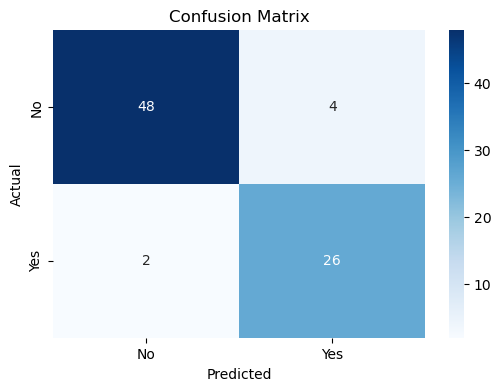

In [14]:
# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [15]:
# Try different values of k and plot accuracy
k_range = range(1, 21)
accuracies = []

In [16]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

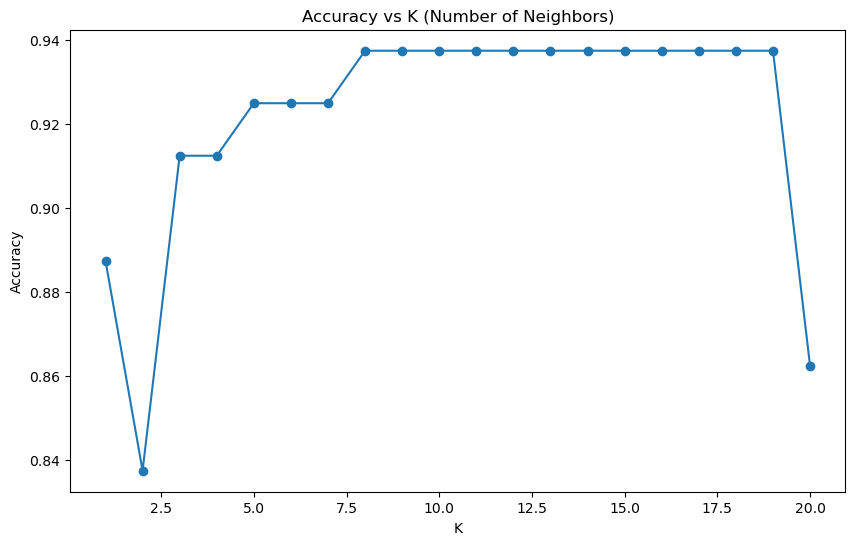

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, accuracies, marker='o')
plt.title("Accuracy vs K (Number of Neighbors)")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.show()